## X-y split (y is the target variable, in this case, "total claim amount")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [15]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

In [16]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


In [18]:
X=numerical_df[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
y=numerical_df['total_claim_amount']

## Train-test split.

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state = 42)

## Standardize the data (after the data split!).

In [22]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

In [23]:
##checking for the input variables distribution is normal or not 

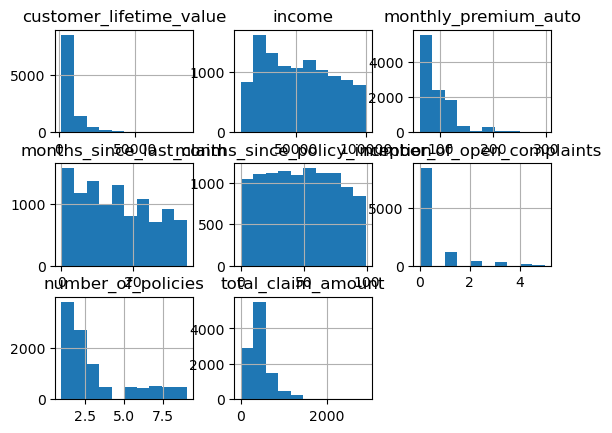

In [24]:
numerical_df.hist()
plt.show()

In [39]:
## changing the distributions to normal using poer transform

In [40]:
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer()

In [43]:
scaler_fit = scaler.fit(X_train)
scaler_transform_train = scaler.transform(X_train)
scaler_transform_test = scaler.transform(X_test)

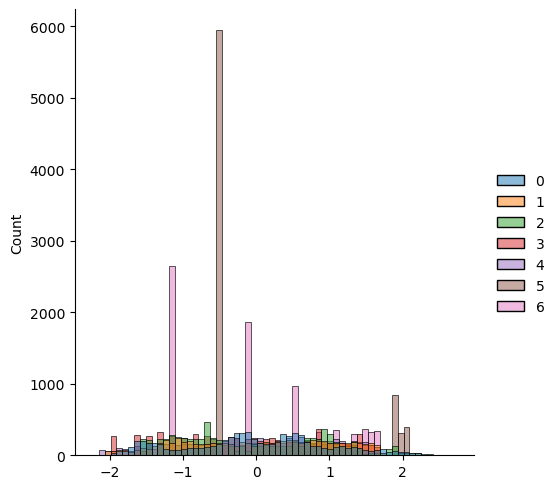

In [53]:
sns.displot(scaler_transform_train)

## Apply linear regression

In [48]:
from sklearn.linear_model import LinearRegression

In [50]:
lm=LinearRegression()

In [54]:
model=lm.fit(scaler_transform_train,y_train)

In [55]:
model.coef_

array([ -2.13594719, -36.7201968 , 161.12276203,   3.5527067 ,
        -2.03301237,  -1.17714444,   1.58807445])

In [56]:
model.intercept_

433.3067361668137

In [57]:
y_test

3487      120
668       660
10315     244
5332       86
1523     1032
         ... 
5928      406
3706      321
7735       45
9320      597
7924       48
Name: total_claim_amount, Length: 3207, dtype: int64

In [58]:
y_pred=model.predict(X_test)

C:\Users\samra\Documents\Ammu\Python\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [59]:
y_pred

array([-2667941.89525947, -1565157.44340696, -2504168.06384336, ...,
        -775856.38223441, -1306309.30472135, -3680095.72724694])

In [60]:
y_test-y_pred

3487     2.668062e+06
668      1.565817e+06
10315    2.504412e+06
5332     2.242481e+06
1523     1.691584e+06
             ...     
5928     1.160631e+06
3706     2.033059e+06
7735     7.759014e+05
9320     1.306906e+06
7924     3.680144e+06
Name: total_claim_amount, Length: 3207, dtype: float64

In [61]:
compare=pd.DataFrame({'y_test':list(y_test),'y_pred':list(y_pred)})

In [62]:
compare

,y_test,y_pred
0,120,-2.667942e+06
1,660,-1.565157e+06
2,244,-2.504168e+06
3,86,-2.242395e+06
4,1032,-1.690552e+06
...,...,...
3202,406,-1.160225e+06
3203,321,-2.032738e+06
3204,45,-7.758564e+05
3205,597,-1.306309e+06


## Model Interpretation.

In [63]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [64]:
mse(y_test,y_pred)

4463526395185.921

In [65]:
mae(y_test, y_pred)

1904977.021158259

In [66]:
import matplotlib.pyplot as plt

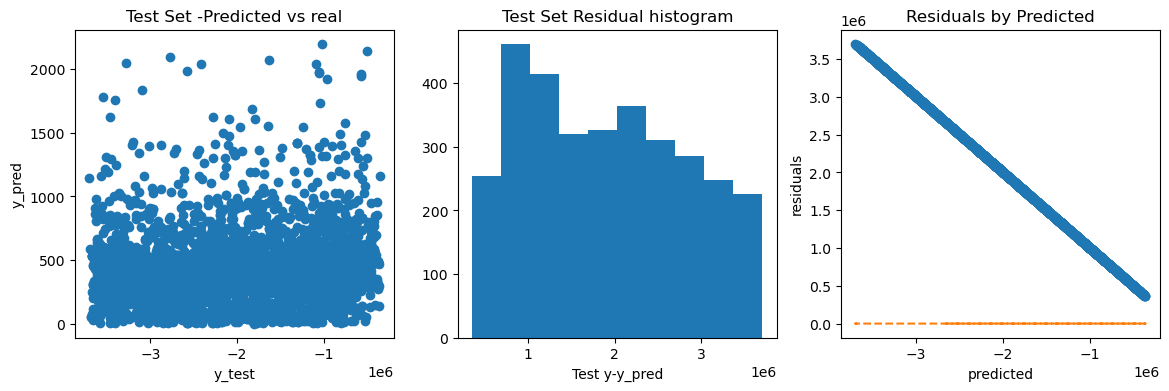

In [67]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')